# 탐색적 분석 (exploratory data analysis: EDA)  
- 데이터 분석의 첫 번째 단계로  
- 본격적인 데이터 분석을 수행하기에 전에 데이터의 전체적인 특성을 살펴보는 것
- (수집한 데이터가 분석에 적절한지 알아보는 과정)
- 그래프와 통게적 분석 방법을 활용하여 데이터 탐구 수행  
---
- 데이터의 양, 유형과 범위, 유효성, 비율, 분포 등 파악
- (분석하기에 데이터양이 적절한지, 쓸모있는 데이터인지 확인)
---
- 데이터 전처리를 같이 수행하기도 함
  - 데이터 클리닝 - 결측치 및 잘못된 값 처리
  - 스케일링 - 표준 스케일링, min-max 스케일링
  - 결측치/이상치 처리 - 결측치/이상치 탐지 및 제거/대체
  - 데이터 변환 - 로그 변환, 카테고리 인코딩 등


## 주택가격 데이터 탐색
- 사용 데이터 : 미국 아이오와 주의 에임즈(Ames) 지방의 주택 가격 정보 데이터
- 79개의 변수로 구성 

### 주택가격 데이터 탐색 수행 작업

- 데이터 특성 파악 : 기본 정보 확인
  - df.info() : 컬럼 확인
  - features(컬럼) 설명 자료 활용
  - 박스 플롯으로 기초 통계 분포 확인 
  - 히스토그램으로 발생 빈도수 확인
  - distplot() 으로 분포 확인 (왜도/첨도 확인)
    - 정규분포에서 많이 벗어나 있으면 로그변환 수행 필요

- 목적변수(타겟 변수)와 다른 입력 변수(피처)들 과의 관계 확인
  - 히트맵으로 상관관계 파악
  - pairplot()으로 확인
  - 산포도로 확인 : 관계 및 이상치 파악

- 카테고리 특성과의 관계 확인
  - 박스플롯  확인
    -- 예) 평점에 따른 가격 차이
           연도별 주택카격 변화 추이 확인

- 결측치 확인
- 이상치 확인
  - 확률 분포에서 찾기 : distplot()
  - 산포도로 찾기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import seaborn as sns
from scipy.stats import norm #science python 의 통계 패키지의 정규분포와 비슷한지 확인
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [4]:
# 주택가격 데이터 
data = pd.read_csv("data/house_price.csv")
data.head(3)
data.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df = data.copy()

## 데이터 특성 파악
- 특성 설명 : features(컬럼) 설명 자료 필요함 (도메인지식이 분석에 아주 중요함)
---
- SalePrice: 판매가격(달러), 목적변수
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## 목적 변수 (타겟 값) 
- 주택 가격이므로 SalePrice가 목적변수 임
- 주택 가격 예측 

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

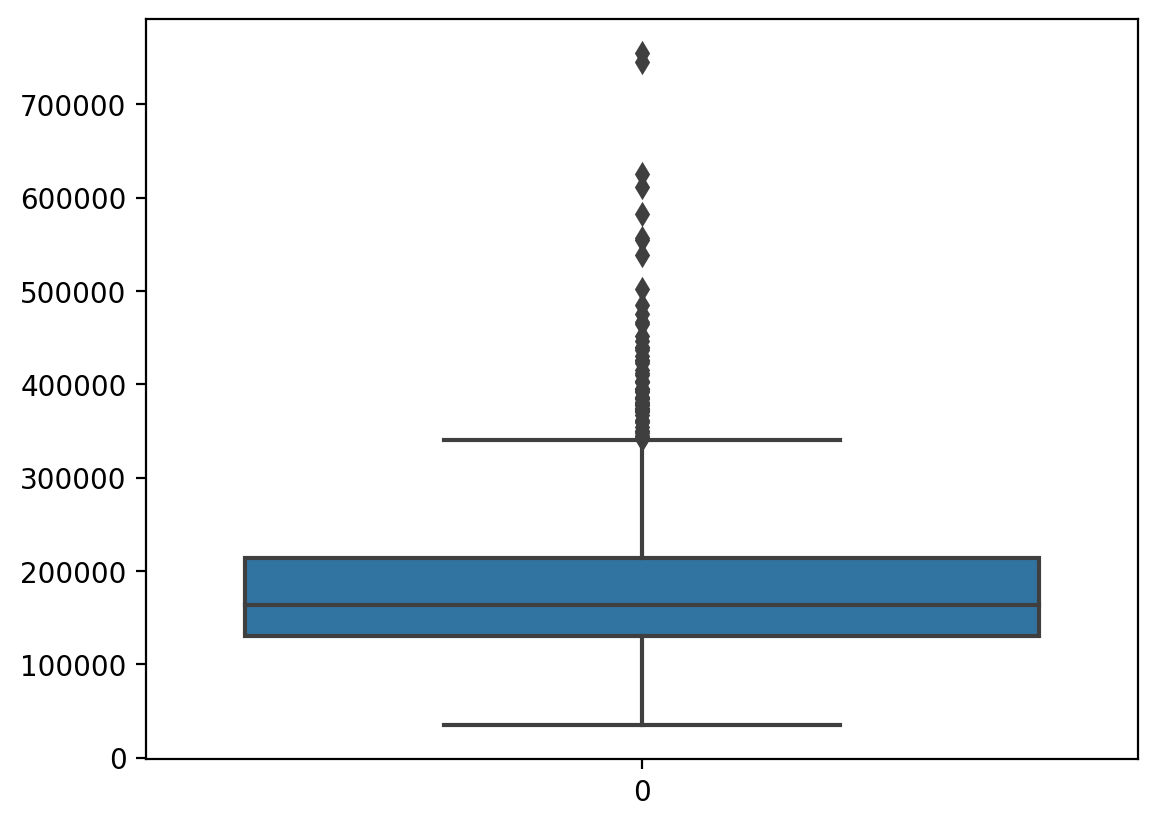

In [8]:
# boxplot
sns.boxplot(df['SalePrice'])
plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

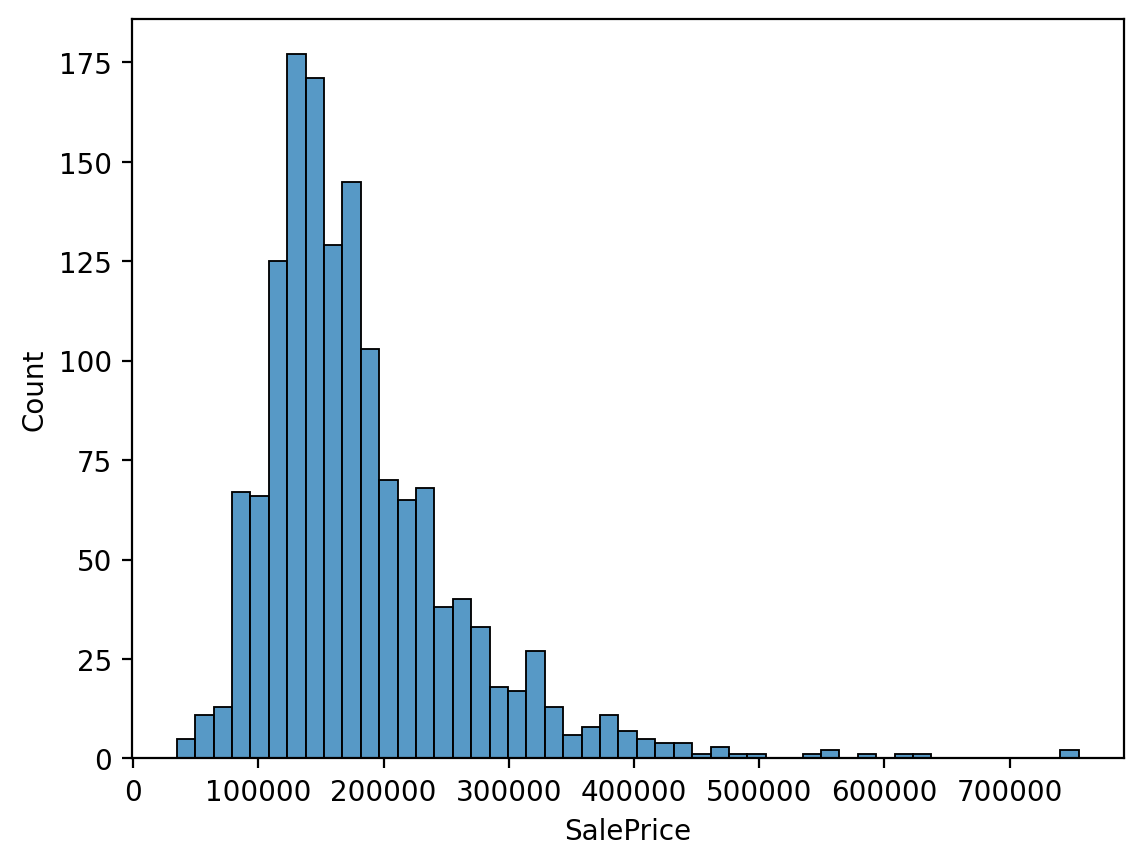

In [9]:
# histplot
sns.histplot(df['SalePrice'])
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

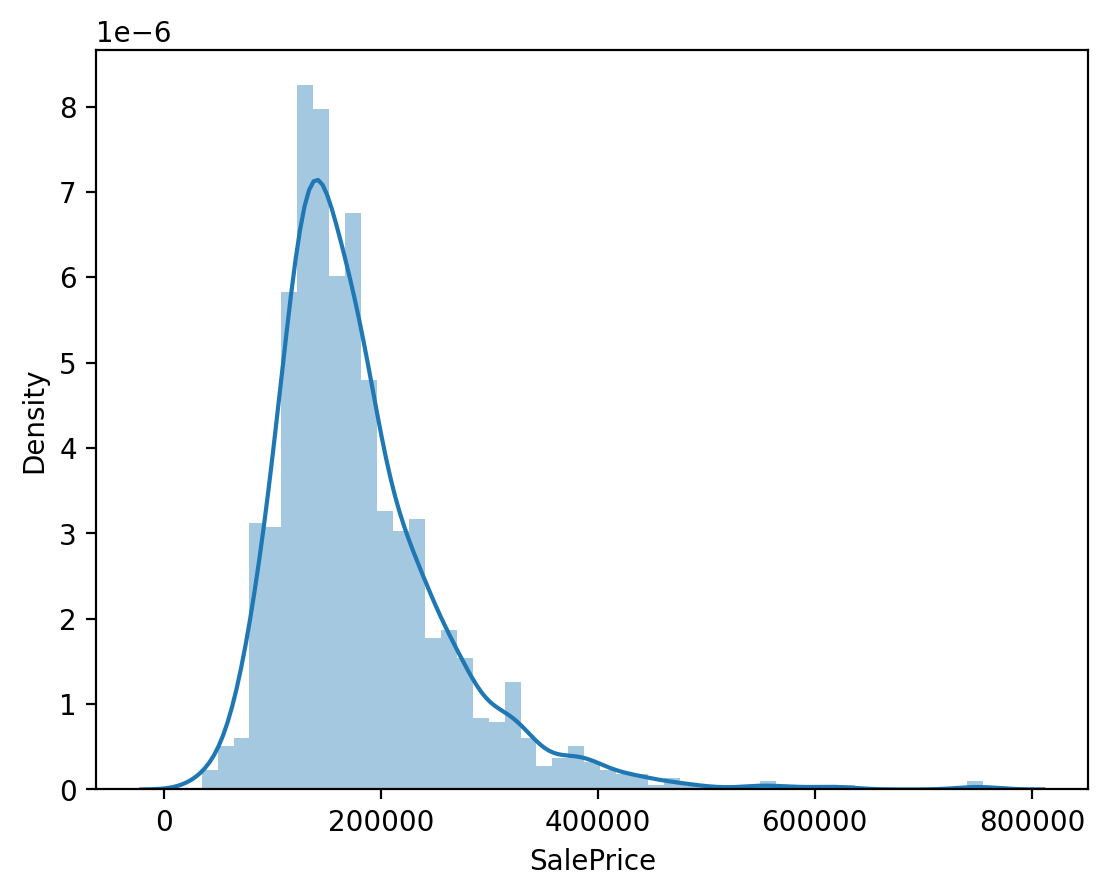

In [10]:
sns.distplot(df['SalePrice'])
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

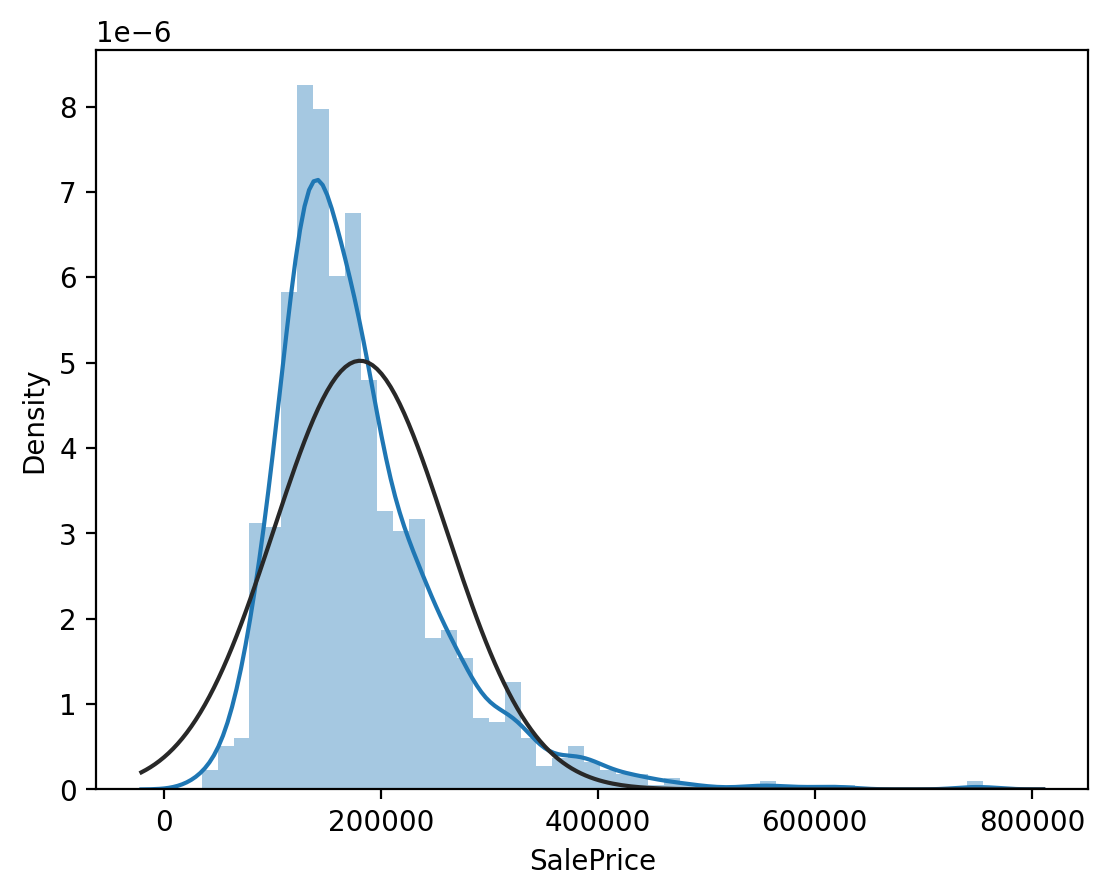

In [11]:
sns.distplot(df['SalePrice'], fit=stats.norm)
plt.show()

## 정규분포와 유사한지 확인  
- 데이터가 정규분포를 따르면 평균값, 분산 등을 예측하기 수월하기 때문에
- 정규분포에서 얼마나 벗어났는지 확인 
- skewness (왜도: 대칭성) 
- kurtosis (첨도: 끝부분의 모양)
- 왜도와 첨도 값들이 0에 가까울수록 정규분포와 유사 

skewness :  1.880940746034036
kurtosis :  6.509812011089439


<Axes: xlabel='SalePrice', ylabel='Density'>

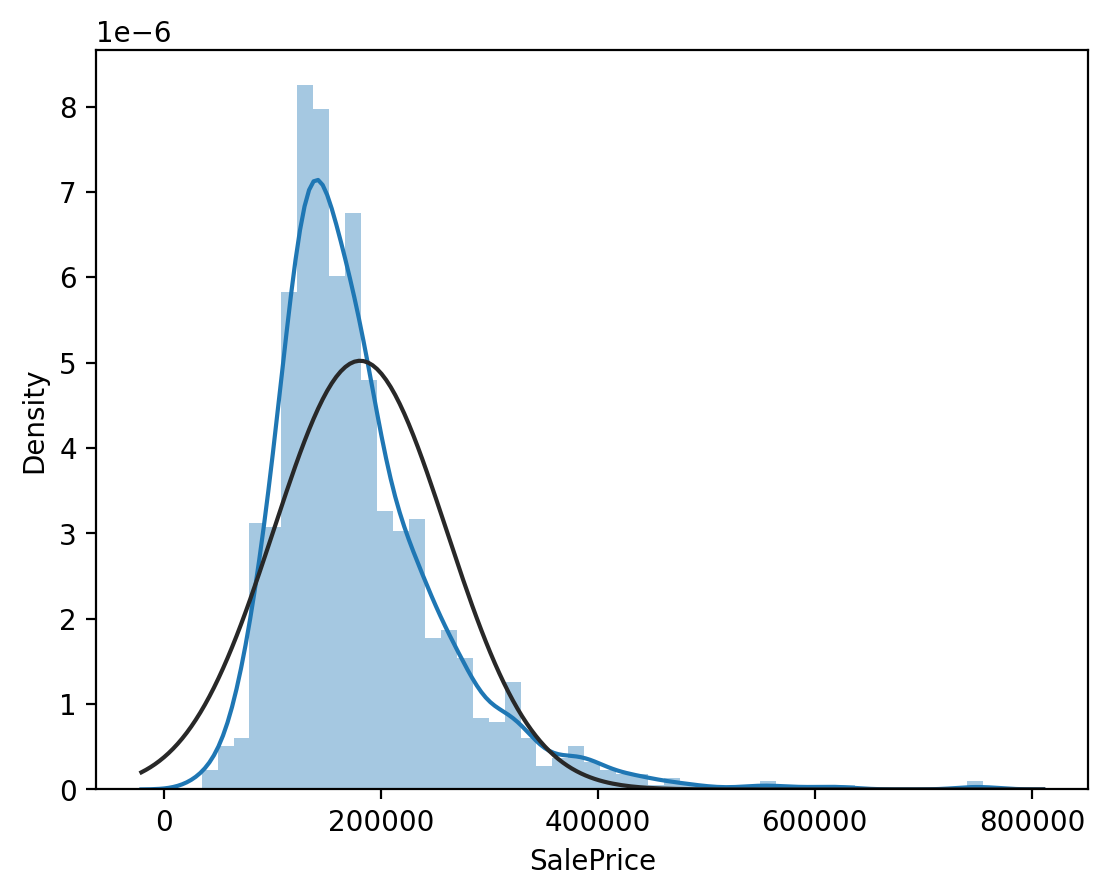

In [12]:
x1 = df['SalePrice']
print("skewness : ", stats.skew(x1))
print("kurtosis : ", stats.kurtosis(x1))
sns.distplot(x1, fit=stats.norm)

skewness :  0.1212103673013655
kurtosis :  0.8026555069117713


<Axes: xlabel='SalePrice', ylabel='Density'>

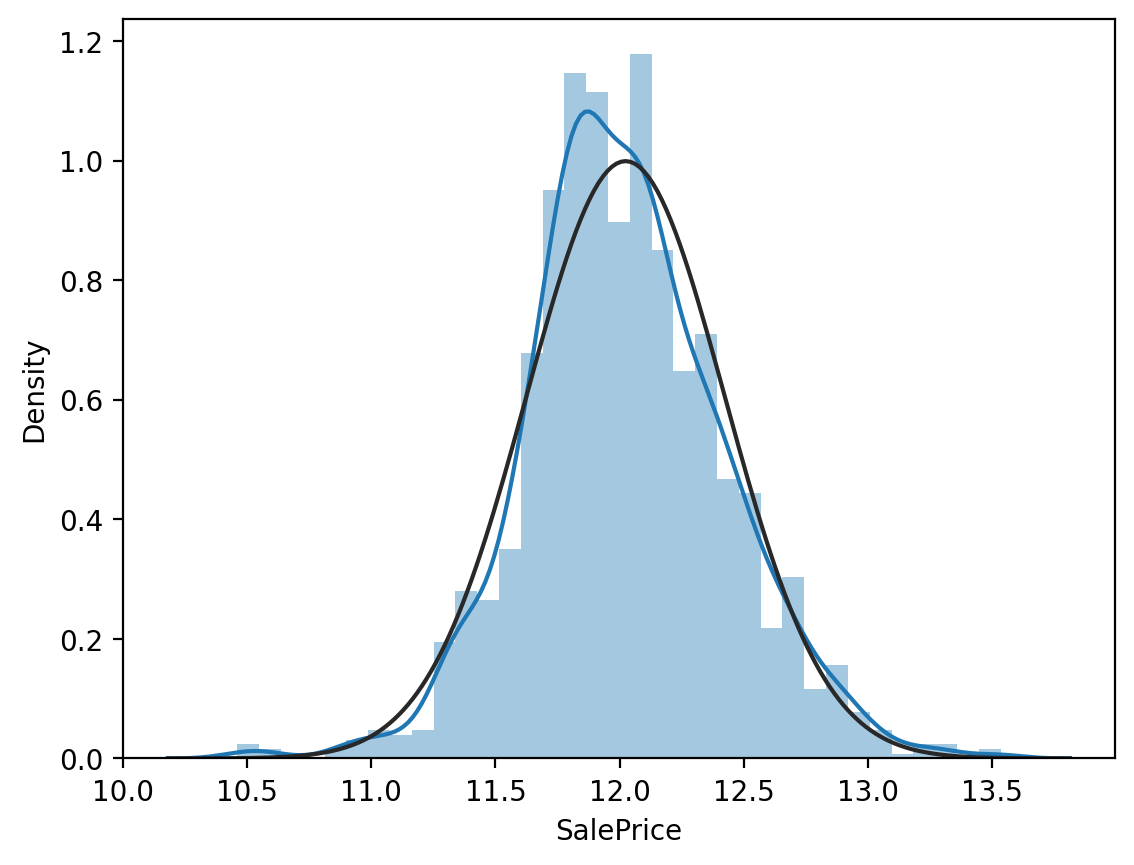

In [13]:
x2 = np.log(df['SalePrice']) # 로그 함수에 대입함으로서 정규분포와 상당히 유사해졌다
print("skewness : ", stats.skew(x2))
print("kurtosis : ", stats.kurtosis(x2))
sns.distplot(x2, fit=stats.norm)

## 목적변수(타겟 변수)와 다른 입력 변수(피처)들 과의 관계 확인  
- 상관관계 확인 (상관계수 : 코럴레이션코엡스)

- 데이터 분석은 입력 변수를 사용하여 목적 변수를 예측하는 작업  
- 각 입력 변수와 목적 변수 사이의 상관계수를 보면 데이터의 연관성을 파악하는데 도움이 됨  
- 절대적이진 않음  
    - 예: 중고차 가격(타겟 변수) : 연식(입력 변수)이 오래되면 가격이 떨어짐
---
- 입력 변수(input)의 다른 이름
  - 특성 (features)
  - 설명 변수 (explanatory variable)
  - 독립 변수 (independent variable)
- 목적 변수(target variable) 의 다른 이름
  - 레이블 (label)
  - 출력 변수 (output)
  - 종속 변수 (dependent variable)

### 히트맵으로 상관관계 파악 

In [14]:
object_cols = df.select_dtypes(include=['object']).columns
new_df = df.drop(columns=object_cols)
new_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


<Axes: >

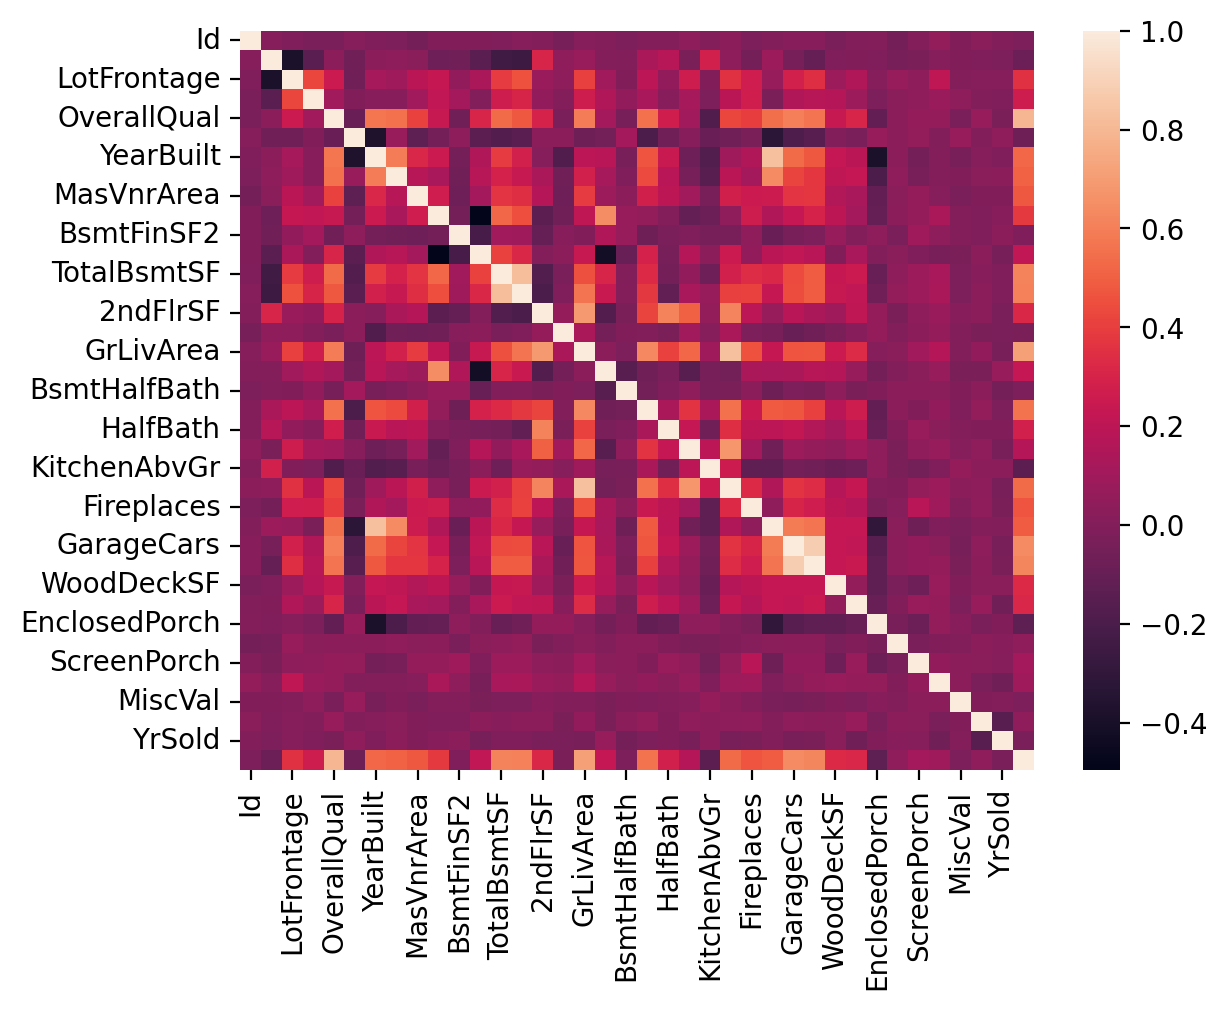

In [20]:
new_df_corr = new_df.corr()
sns.heatmap(new_df_corr)

In [28]:
SPRelation = new_df_corr['SalePrice'].sort_values(ascending=False)
SPRelation.head(11)[1:]
SPRelation.tail(10)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<Axes: >

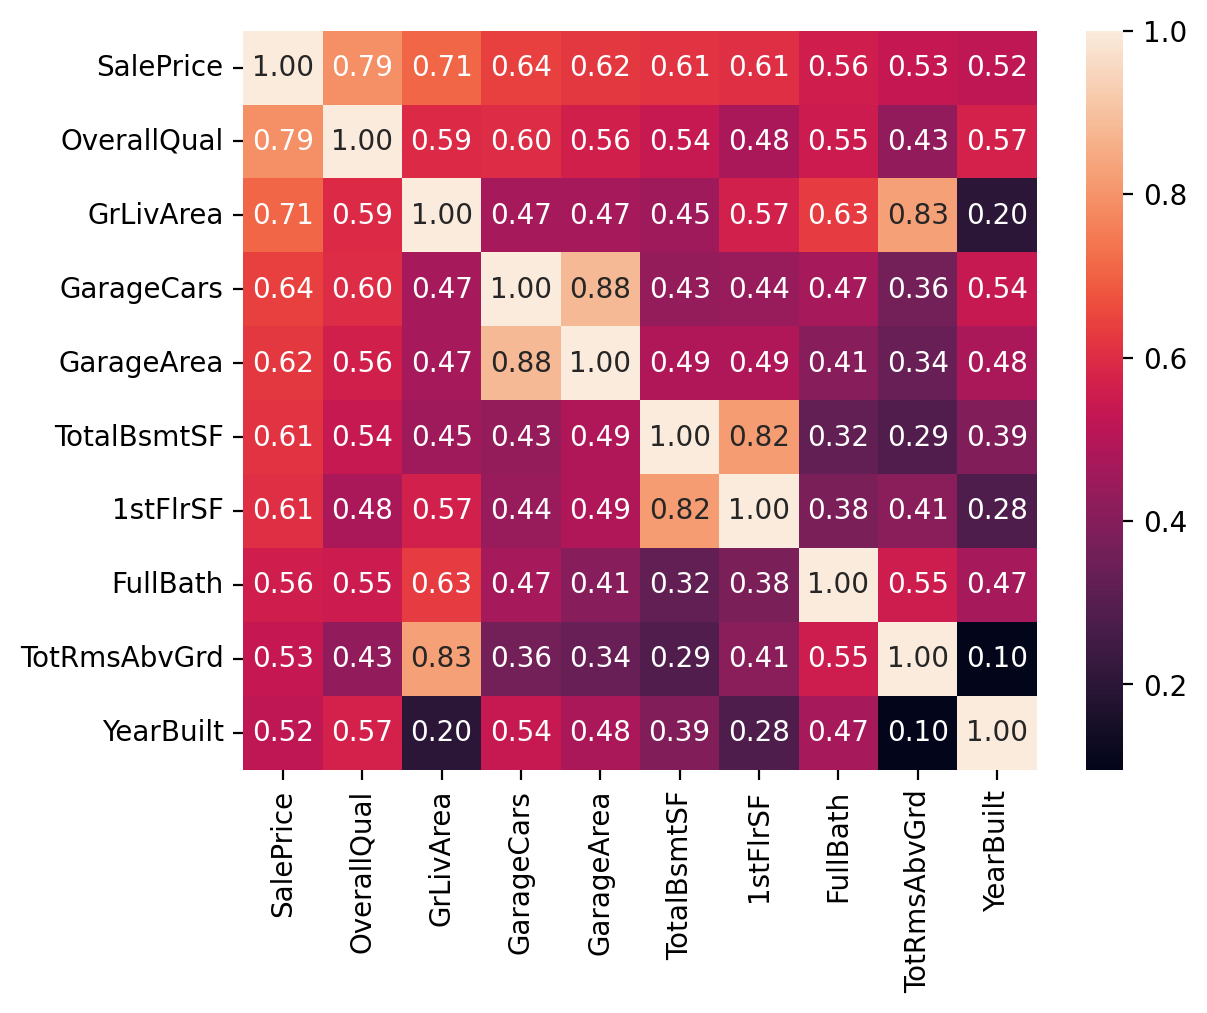

In [31]:
target = SPRelation.head(10).index
sns.heatmap(new_df[target].corr(), annot=True, fmt='.2f')
plt.show()

<Axes: >

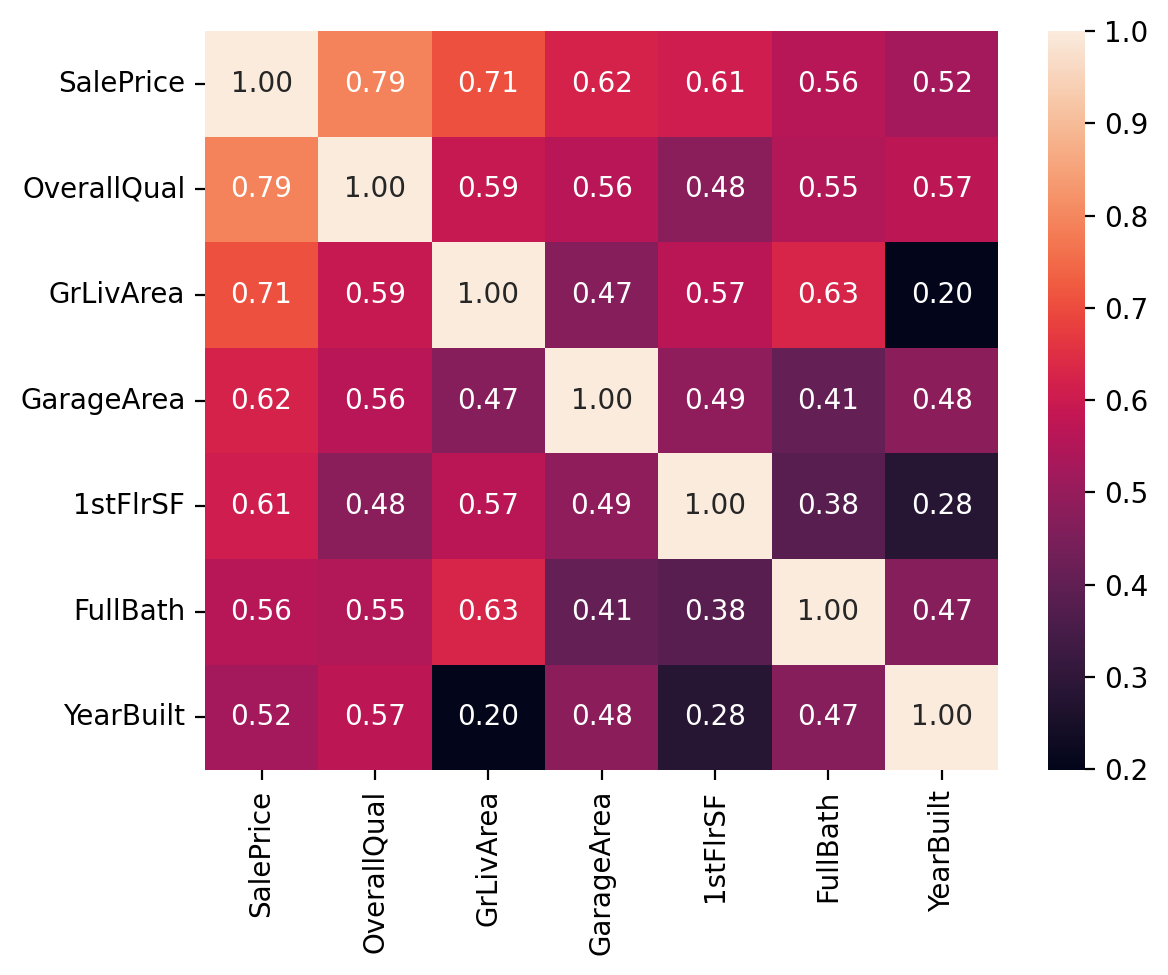

In [35]:
target = target.drop(['TotRmsAbvGrd', 'GarageCars', 'TotalBsmtSF']) # 서로 연관성이 매우 높은 값들 삭제
sns.heatmap(new_df[target].corr(), annot=True, fmt='.2f')
plt.show()

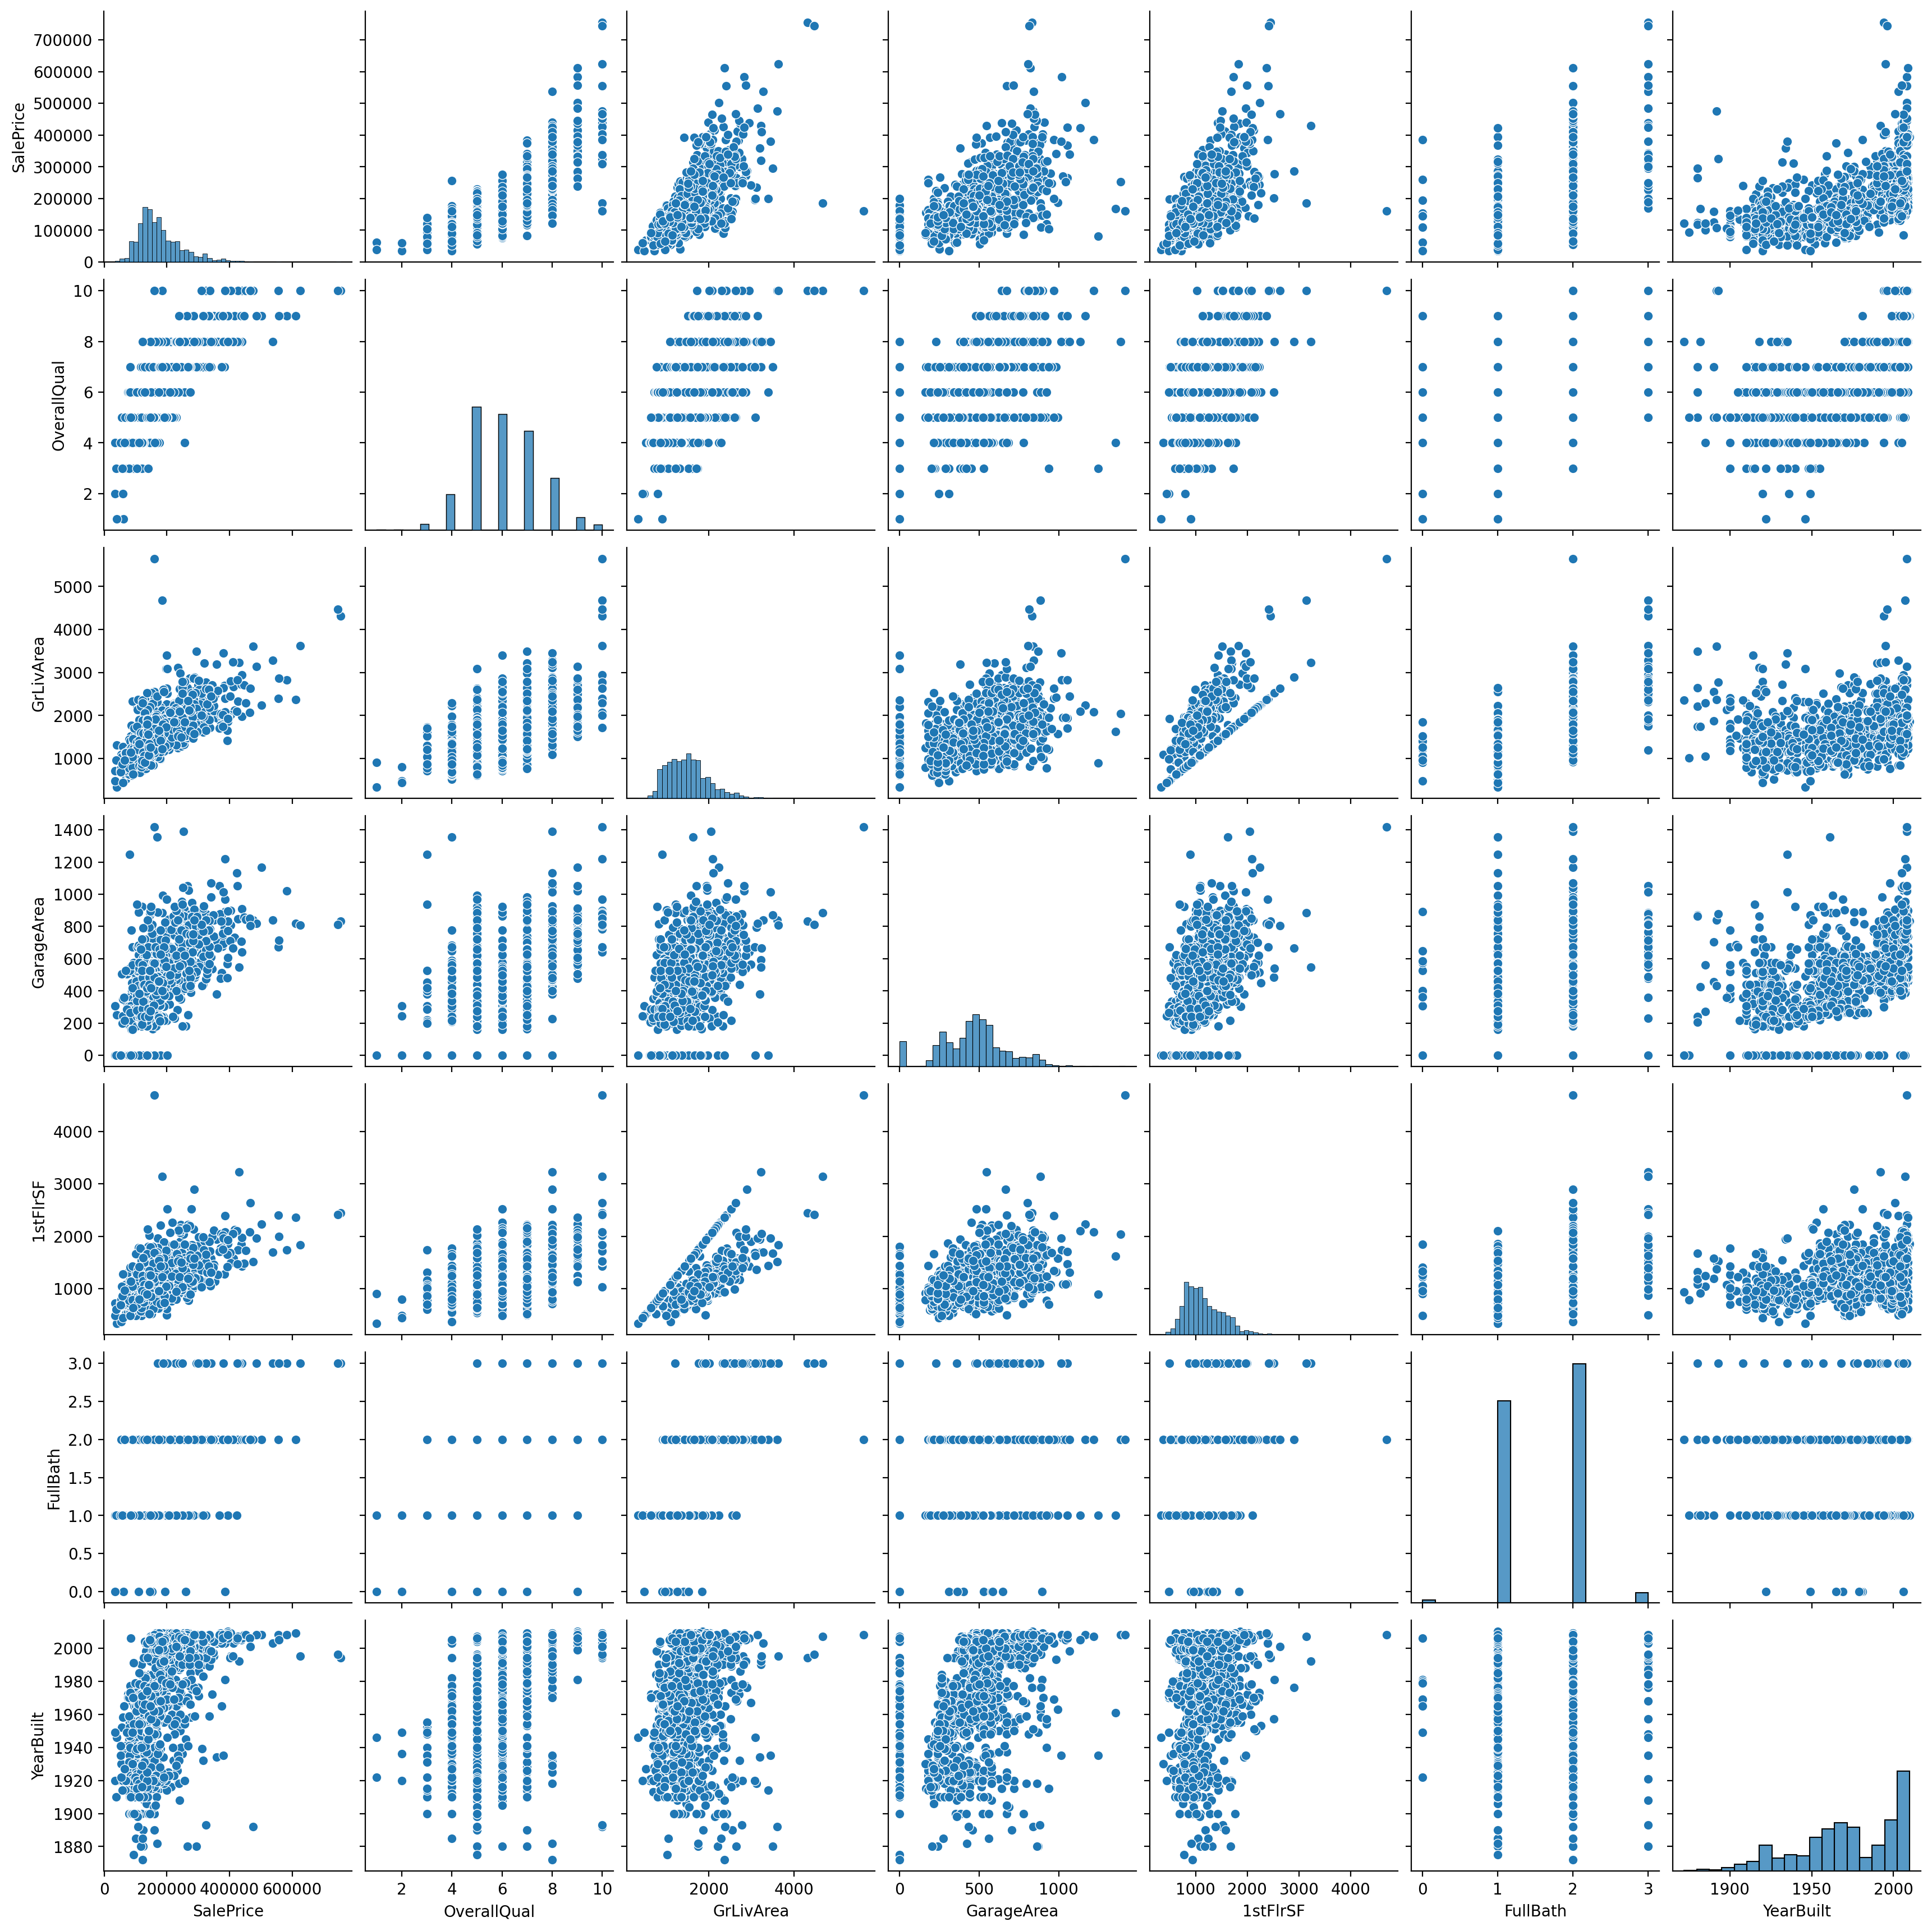

In [36]:
sns.pairplot(new_df[target])
plt.show()

### 산포도 확인
- 두 변수 사이의 관계 파악

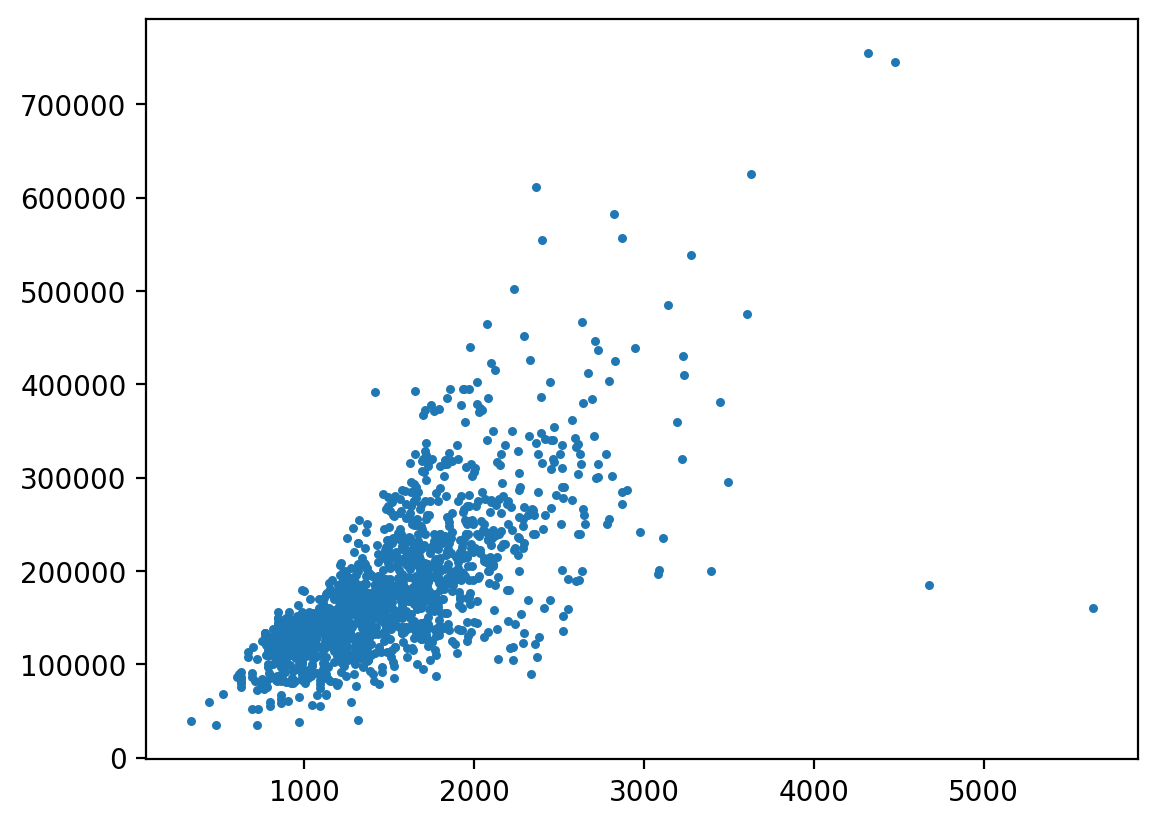

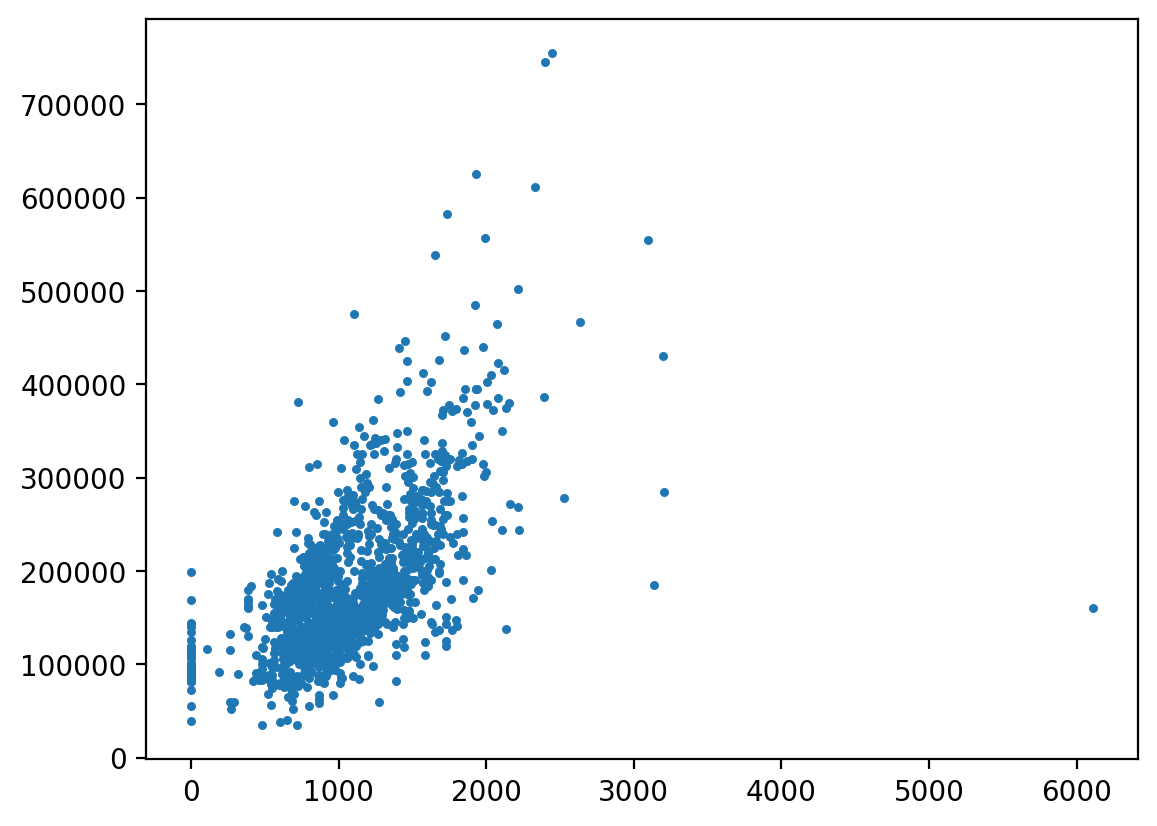

In [40]:
plt.scatter(data=new_df, x='GrLivArea', y='SalePrice', s=5)
plt.show()

plt.scatter(data=new_df, x='TotalBsmtSF', y='SalePrice', s=5)
plt.show()

### 카테고리 특성과의 관계 확인 
- sns 박스플롯으로 보기

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

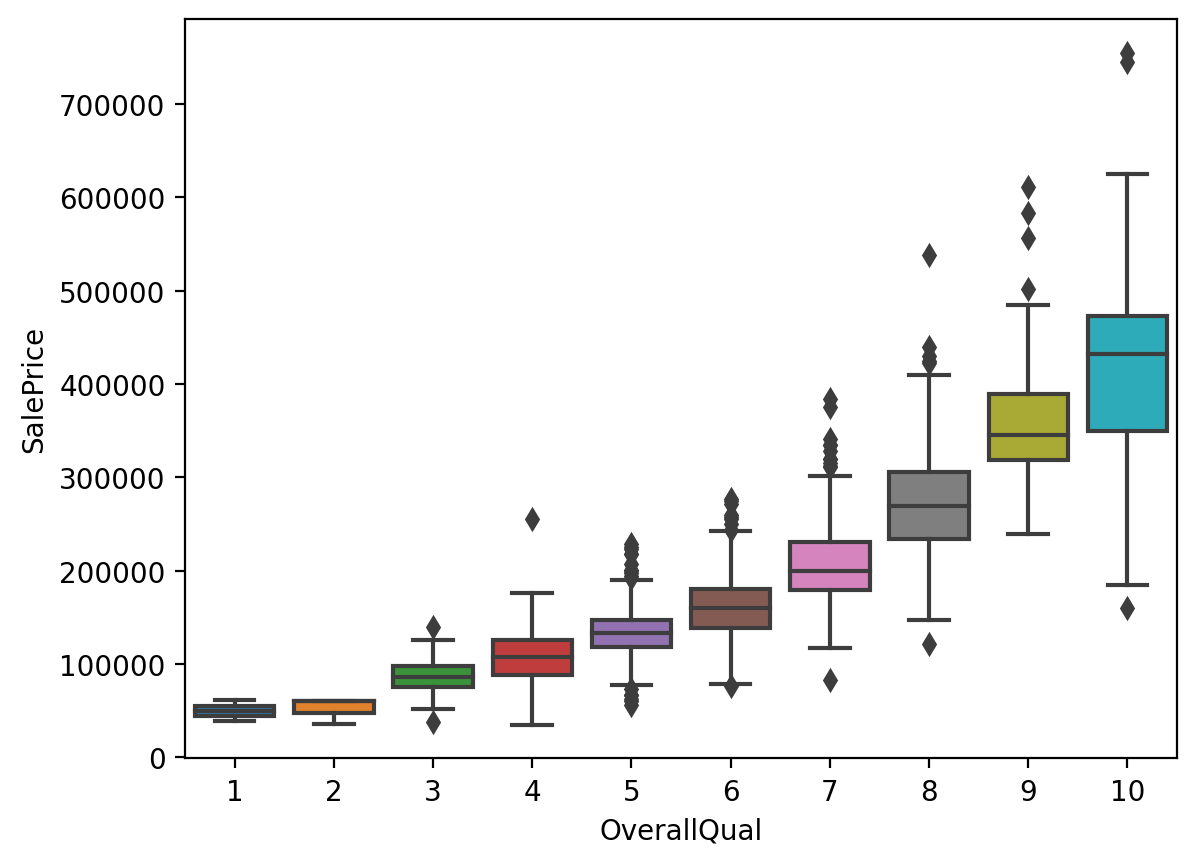

In [42]:
sns.boxplot(data=new_df, x='OverallQual', y='SalePrice')
plt.show()

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

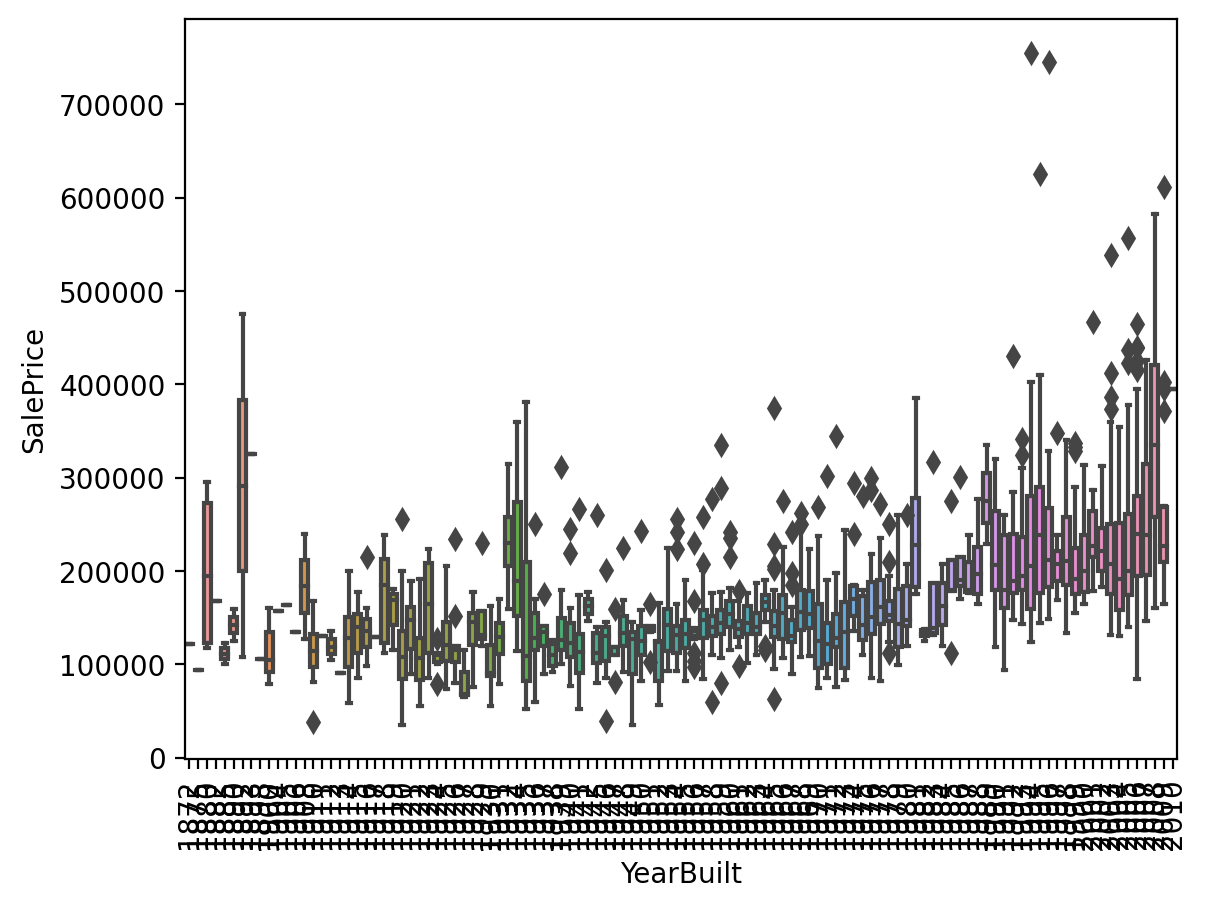

1460

In [54]:
sns.boxplot(data=new_df, x='YearBuilt', y='SalePrice')
plt.xticks(rotation=90)
plt.show()
len(new_df['YearBuilt'])

## 결측치 확인   

In [71]:
nulls = len(df) - df.count()
nulls_df = nulls.sort_values(ascending=False).to_frame()
nulls_df['null_pct'] = (nulls_df[[0]]/len(df)*100).round(2)
nulls_df = nulls_df[nulls_df['null_pct'] > 0]
nulls_df

,0,null_pct
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55


In [72]:
need_to_deleted = nulls_df.index.drop('Electrical')
need_to_deleted

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea'],
      dtype='object')

In [81]:
df_null_dropped = df.drop(columns=need_to_deleted)
idx = df_null_dropped[df_null_dropped['Electrical'].isnull()].index # Electrical이 Null인 인덱스 추출
df_null_dropped = df_null_dropped.drop(index=idx)
df_null_dropped

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## 이상치  확인

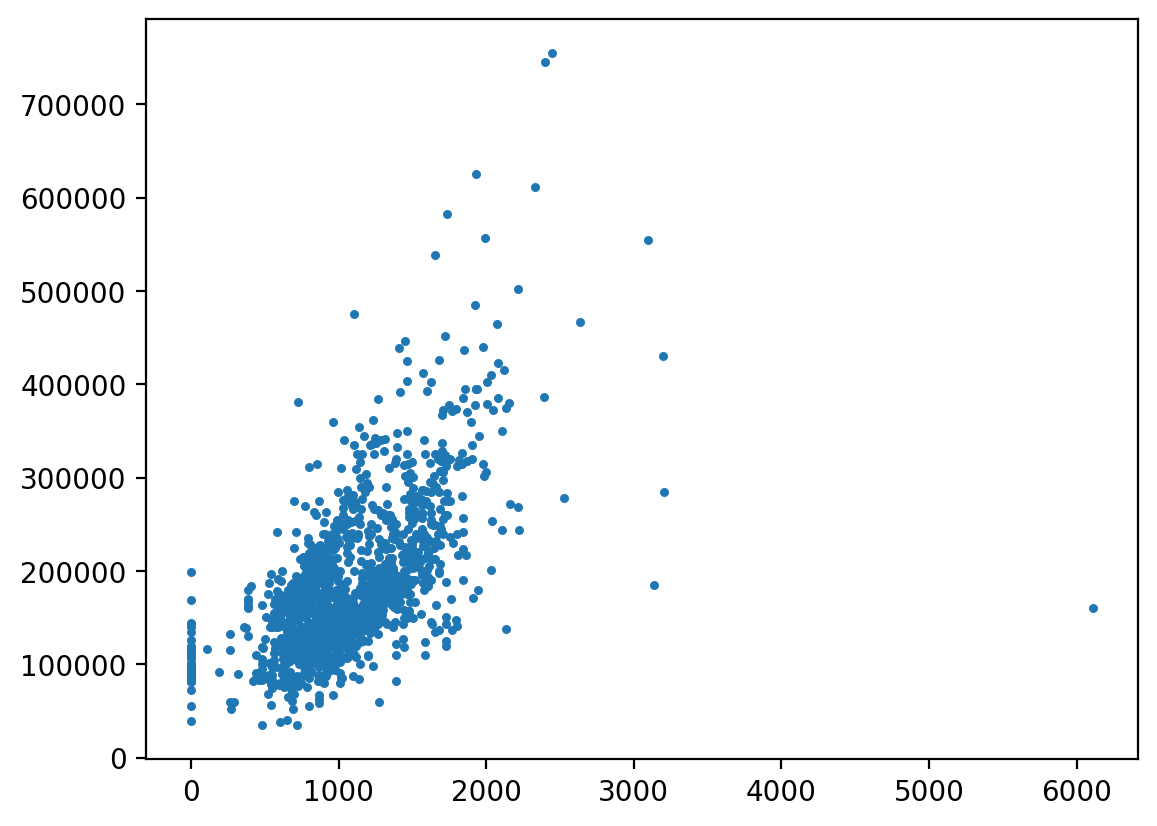

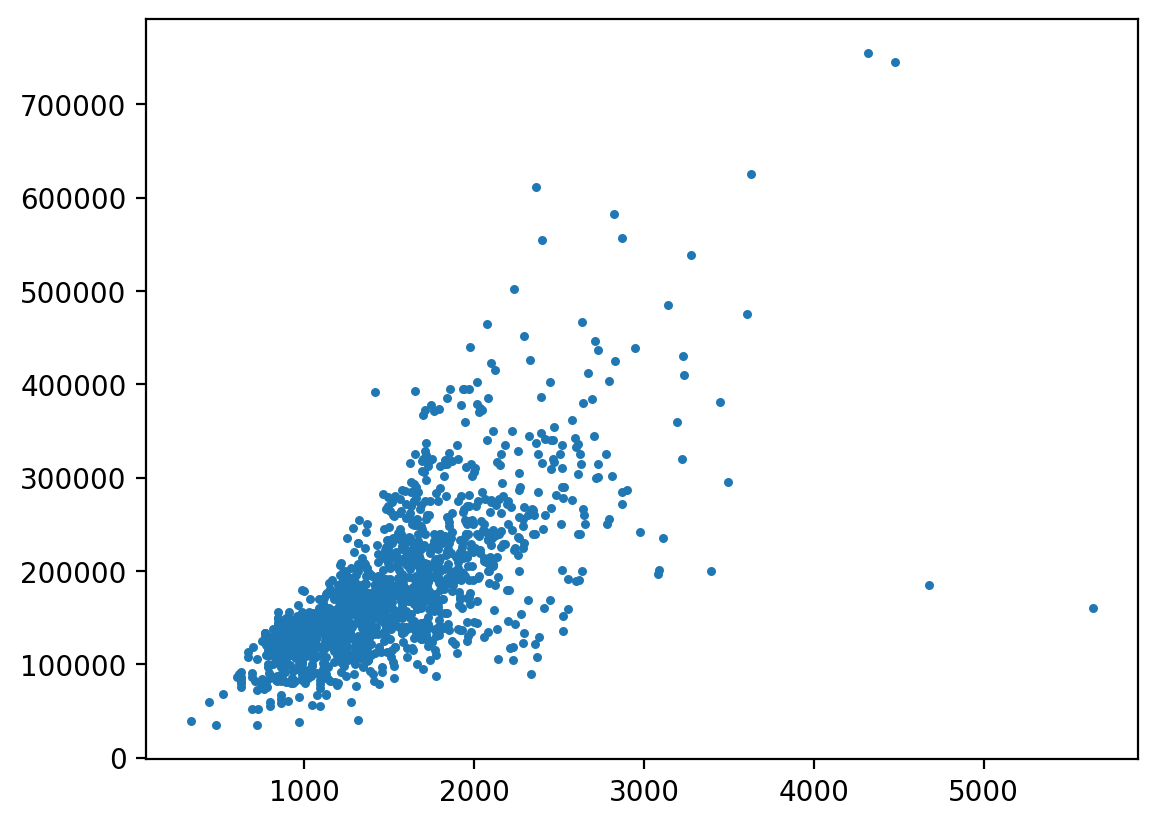

In [84]:
plt.scatter(df['TotalBsmtSF'], df['SalePrice'], s=5)
plt.show()
# 오른쪽 하단 이상치 - 지하실 면적이 많이 넓은데 가격은 상대적으로 많이 저렴

plt.scatter(data=new_df, x='GrLivArea', y='SalePrice', s=5)
plt.show()
# 오른쪽 하단 이상치 - 거실 면적이 많이 넓은데 가격은 상대적으로 많이 저렴